# Lab | Customer Analysis Round 3

## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
marketing_customer_df = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
def clean_col_name (df: pd.DataFrame) -> pd.DataFrame:
    '''
    Function to apply naming convention to column names.
    Convert all names to lower case strings and replace empty spaces with "_".
    Renames st to state.
    
    Input: df: pd.DataFrame
    Output: New DataFrame with replaced values
    '''
    # make a safety copy
    df2= df.copy()
    
    # convert all to lower case names
    df2.columns = df2.columns.str.lower()
    
    # replacing " " with "_" in column names
    df2.columns = map(lambda x: x.replace(" ","_"), df2.columns)
    
    # to replace the column name "ST" (by now its "st") with "state" the rename() method is applied
    df2 = df2.rename(columns={'st':'state'})
    return df2

In [3]:
marketing_customer_df = clean_col_name(marketing_customer_df)

In [4]:
marketing_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [5]:
marketing_customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


<function matplotlib.pyplot.show(close=None, block=None)>

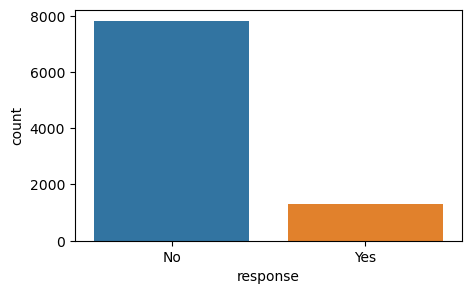

In [6]:
# Show a plot of the total number of responses.
fig = plt.subplots(figsize=(5,3))
sns.countplot(data=marketing_customer_df, x='response')
plt.show

In [7]:
# Response rate by sales channel
groupby = marketing_customer_df.groupby(['sales_channel', 'response'])[['response']].agg('count')
#marketing_customer_df.pivot_table(index='Sales Channel', columns='Response', aggfunc={'Response':'count'})
groupby.columns= ['response_count']
groupby

response_count
sales_channel response                
Agent         No                  2811
              Yes                  666
Branch        No                  2273
              Yes                  294
Call Center   No                  1573
              Yes                  192
Web           No                  1169
              Yes                  156

<function matplotlib.pyplot.show(close=None, block=None)>

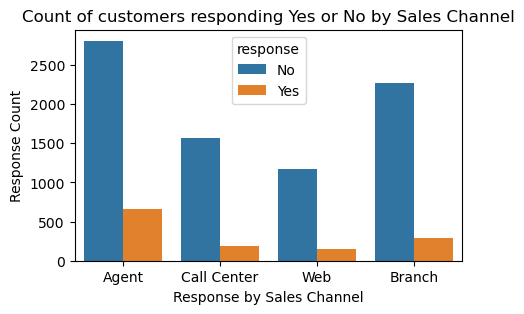

In [8]:
# Show a plot of the response rate by the sales channel.
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data=marketing_customer_df, x='sales_channel', hue='response', ax=ax)
ax.set_xlabel("Response by Sales Channel")
ax.set_ylabel("Response Count")
ax.set_title("Count of customers responding Yes or No by Sales Channel")
plt.show

#### I was practicing a bit. We actually want to see the response RATE. So I defined a function that calculates the rate by Column Elements.

In [9]:
def response_rate_per_categ (df: pd.DataFrame, col= 'sales_channel') -> pd.DataFrame:
    '''
    Calculating the response rate of customers responding Yes of the unique "elements" within a Column.
    Input: Data Frame
           Col for Column Name
    '''
    # make a safety copy
    df2= df.copy()
    
    # Group By Sales Channel and Response (Yes / No) and count Responses per Yes/No
    groupby = df2.groupby([col, 'response'])[['response']].agg('count')
    
    #Rename columns
    groupby.columns = ['response_count']
    
    # Reset Index
    groupby = groupby.reset_index()
    
    #Filter for every element in the column and create new df
    list_of_elements = list(groupby[col].unique())
    rates = {}
    for i in range(len(list_of_elements)):
        df3 = groupby[groupby[col] == list_of_elements[i]]
        #print(df3)
        # create response rate for
        response_rate = df3[(df3['response']=="Yes")]['response_count'].sum()/df3['response_count'].sum()
        #add it as a new column to df3
        rates[list_of_elements[i]] = response_rate
    
    final_df = groupby[groupby['response']=='Yes'].copy()
    final_df.loc[:,'response_rate'] = final_df[col].map(rates)
    return final_df
    

In [10]:
channel_responses = response_rate_per_categ(marketing_customer_df)
channel_responses

,sales_channel,response,response_count,response_rate
1,Agent,Yes,666,0.191544
3,Branch,Yes,294,0.114531
5,Call Center,Yes,192,0.108782
7,Web,Yes,156,0.117736


<function matplotlib.pyplot.show(close=None, block=None)>

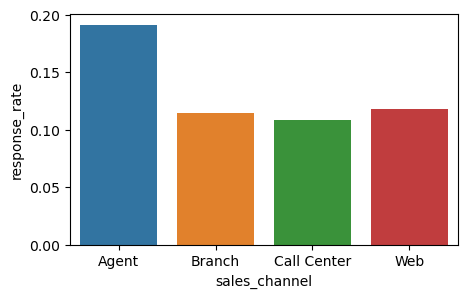

In [11]:
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(data=channel_responses, x='sales_channel', y='response_rate', ax=ax)
plt.show

- the response rate is bad in in all sales channels
- the best response rate is however coming from Agent Channel

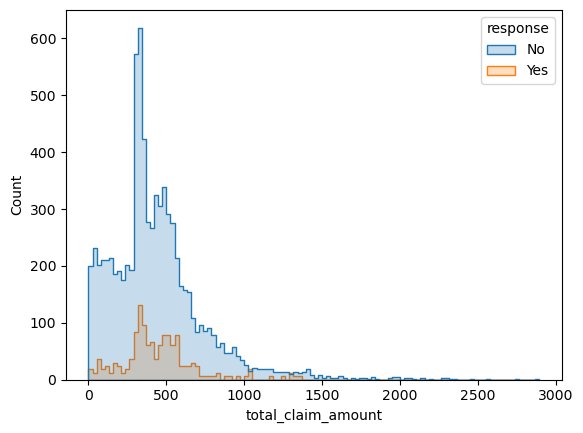

In [12]:
#Show a plot of the response rate by the total claim amount.fig, ax = plt.subplots()
sns.histplot(data=marketing_customer_df, x='total_claim_amount', hue='response', element='step')
ax.set_ylabel("Response Count")
ax.set_title("Response Rate of Customers based on the Total Claim Amount")
plt.show()

- The graph is difficult to analysis. The Response rate is bad (in terms of count) in all Claim Amount Bins.
- Around a claim amount 1000, there are slightly more responses than no responses.

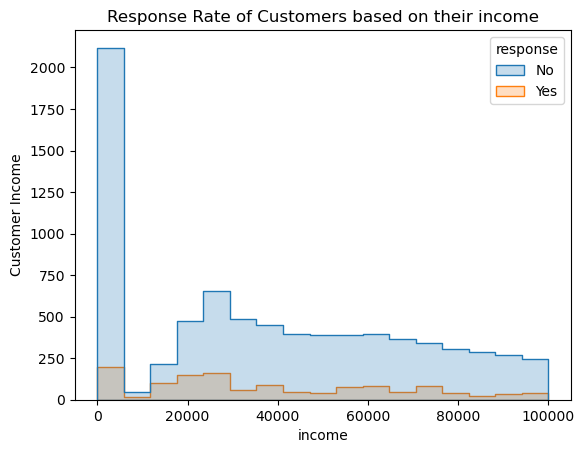

In [13]:
#Show a plot of the response rate by income.
fig, ax = plt.subplots()
sns.histplot(data=marketing_customer_df, x='income', hue='response', element='step')
ax.set_ylabel("Response Count")
ax.set_ylabel("Customer Income")
ax.set_title("Response Rate of Customers based on their income")
plt.show()

- Lower Income Customers have a very low response rate.

# Lab | Data Transformations

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [15]:
numerical_df = marketing_customer_df.select_dtypes(include='number')
categoricals_df = marketing_customer_df.select_dtypes(exclude='number')

In [16]:
numerical = marketing_customer_df.select_dtypes(include='number').columns
categoricals = marketing_customer_df.select_dtypes(exclude='number').columns
#checks:
#len(numerical) + len(categorical) == marketing_customer_df.dtypes.count()

- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

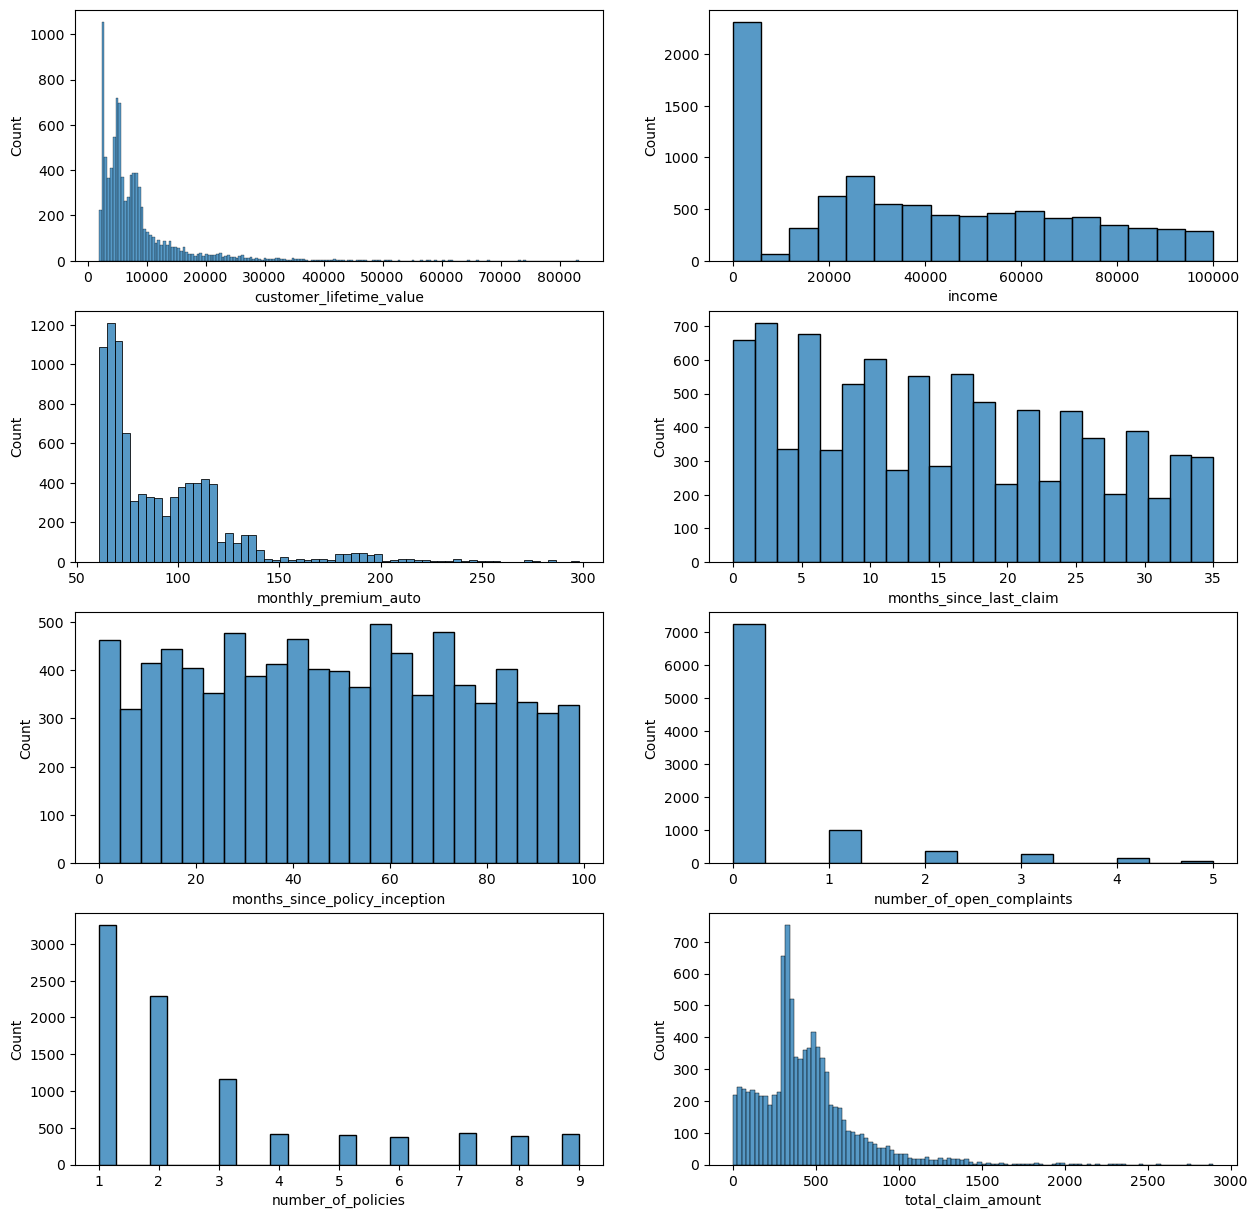

In [17]:
fig, ax = plt.subplots(4,2, figsize=(15,15))
sns.histplot(data = marketing_customer_df, x='customer_lifetime_value', ax=ax[0,0])
sns.histplot(data = marketing_customer_df, x='income', ax=ax[0,1])
sns.histplot(data = marketing_customer_df, x='monthly_premium_auto', ax=ax[1,0])
sns.histplot(data = marketing_customer_df, x='months_since_last_claim', ax=ax[1,1])
sns.histplot(data = marketing_customer_df, x='months_since_policy_inception', ax=ax[2,0])
sns.histplot(data = marketing_customer_df, x='number_of_open_complaints', ax=ax[2,1])
sns.histplot(data = marketing_customer_df, x='number_of_policies', ax=ax[3,0])
sns.histplot(data = marketing_customer_df, x='total_claim_amount', ax=ax[3,1])
plt.show()

In [18]:
# Calculating the skew for all numerical variables. Check if it is outside range [-2,2].
skew_dict_outside_range = {'Variable_out':[], 'Skew':[]}
skew_dict_inside_range = {'Variable_in':[], 'Skew2':[]}
for i in range(len(numerical)):
    if marketing_customer_df[numerical[i]].skew() <= -2 or marketing_customer_df[numerical[i]].skew() >= 2:
        skew_dict_outside_range['Variable_out'].append(numerical[i])
        skew_dict_outside_range['Skew'].append(marketing_customer_df[numerical[i]].skew())
    else:
        skew_dict_inside_range['Variable_in'].append(numerical[i])
        skew_dict_inside_range['Skew2'].append(marketing_customer_df[numerical[i]].skew())
display(pd.DataFrame(skew_dict_outside_range))
display(pd.DataFrame(skew_dict_inside_range))

,Variable_out,Skew
0,customer_lifetime_value,3.032280
1,monthly_premium_auto,2.123546
2,number_of_open_complaints,2.783263


,Variable_in,Skew2
0,income,0.286887
1,months_since_last_claim,0.278586
2,months_since_policy_inception,0.040165
3,number_of_policies,1.253333
4,total_claim_amount,1.714966


- For the numerical variables, check the multicollinearity between the features. 
- Please note that we will use the column total_claim_amount later as the target variable.
- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. 
- Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
Plot the heatmap of the correlation matrix after the filtering.

In [21]:
# Checking overall correlation between variables
correlation_matrix = numerical_df.corr().round(4)
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.0000,0.0244,0.3963,0.0115,0.0094,-0.0363,0.0220,0.2265
income,0.0244,1.0000,-0.0167,-0.0267,-0.0009,0.0064,-0.0087,-0.3553
monthly_premium_auto,0.3963,-0.0167,1.0000,0.0050,0.0203,-0.0131,-0.0112,0.6320
months_since_last_claim,0.0115,-0.0267,0.0050,1.0000,-0.0430,0.0054,0.0091,0.0076
months_since_policy_inception,0.0094,-0.0009,0.0203,-0.0430,1.0000,-0.0012,-0.0133,0.0033
number_of_open_complaints,-0.0363,0.0064,-0.0131,0.0054,-0.0012,1.0000,0.0015,-0.0142
number_of_policies,0.0220,-0.0087,-0.0112,0.0091,-0.0133,0.0015,1.0000,-0.0024
total_claim_amount,0.2265,-0.3553,0.6320,0.0076,0.0033,-0.0142,-0.0024,1.0000


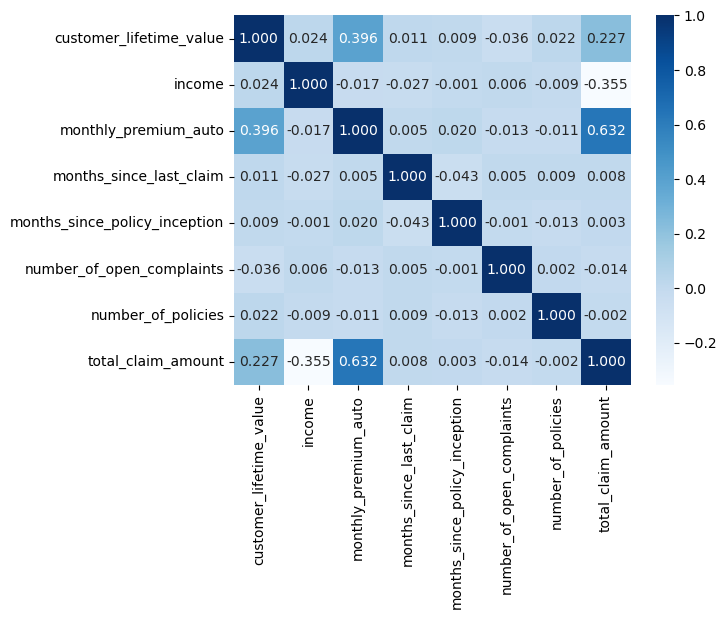

In [22]:
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.3f')
plt.show()

In [23]:
def significant_vars (df: pd.DataFrame, y: str, treshold=0.3):
    '''
    Checking all if any corr in the corrleation matrix exceed a given threshold.
    Gathers all that >= treshold or <= -treshold into a list.
    '''
    df2 = df.copy()
    corr_matrix = df2.corr()
    corr_with_y = corr_matrix.loc[:,y].reset_index()

    significant_corr = corr_with_y[(corr_with_y[y]>=treshold) | (corr_with_y[y]<=(-treshold))]
    significant_vars_list = list(significant_corr.iloc[:,0])
    significant_vars_list.remove(y)
    return significant_vars_list

In [24]:
# listing all variables that have at least some "significant" correlation with total_claim_amount:
significant_vars(numerical_df, 'total_claim_amount')

['income', 'monthly_premium_auto']

- I had to select a lower treshold as there were not so many variables coming closer to an adequate treshold of 0.7.
- I decided for (-)0.3 as this indicates at least a low positive or negative correlation.
- In case this results in a model with high errors, I will start again without 'income'.
- Monthly premium auto has a corr=0.6 which is at least moderate positive correlating

#### Checking for multicollinearity

In [25]:
#testing correlations of others variables to see if there's a threat of multicollinearity
selected_columns = list(numerical)
selected_columns.remove("total_claim_amount")

for i in selected_columns:
    if len(significant_vars(numerical_df, i, treshold=0.3))!=0:
        print(f"Column {i} shows also some significant corr with:")
        print(significant_vars(numerical_df, i, treshold=0.3))

Column customer_lifetime_value shows also some significant corr with:
['monthly_premium_auto']
Column income shows also some significant corr with:
['total_claim_amount']
Column monthly_premium_auto shows also some significant corr with:
['customer_lifetime_value', 'total_claim_amount']


There is a low correlation between customer_lifetime_value and monthly_premium_auto.
CLV is however not correlating so much with total_claim_amount and therefore excluded in the regression model for now.

For practicing reasons I will perform the VIF anyway for all variables as well as for the two selected variables only.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given columns
def compute_vif(df: pd.DataFrame, columns: list):
    
    # create dataframe only of one column
    X = df[columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [27]:
# All numerical columns will be considered 
selected_columns = list(numerical)
selected_columns.remove("total_claim_amount")

# compute vif
vif_df = compute_vif(numerical_df, selected_columns)
display(vif_df)

,Variable,VIF
0,customer_lifetime_value,1.190178
1,monthly_premium_auto,1.188198
2,months_since_last_claim,1.002828
3,months_since_policy_inception,1.002441
4,income,1.002301
5,number_of_open_complaints,1.001420
6,number_of_policies,1.001295


- all VIFs are mostly around 1 (and not >3)
- 1 means: not correlated (VIF 1-5: moderately correlated)

In [ ]:
# in case VIF >3, delete that column name from selected_columns list and repeat calculation

In [ ]:
# not needed but kept here for documentation:
#while any(vif_df['VIF']>3):
#    selected_columns.remove(vif_df.iloc[0,0])
#    display(vif_df)
#    print(selected_columns)
#    vif_df = compute_vif(reg_data, selected_columns)

#display(vif_df)
#print("The final selected columns are: ", selected_columns)

- most variables do not strongly correlate with total_claim_amount
- income and monthly_premium_auto can be used

Performing another VIF for only those 2 variables that have a low-medium correlation with total_claim_amount:

In [28]:
# Only those that were checked for signifant correlation will be taken into account. 
# I take these calculated in the significant_vars function earlier:

vif_df2 = compute_vif(numerical_df, significant_vars(numerical_df, 'total_claim_amount'))
display(vif_df2)

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_54479/2739581792.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'intercept'] = 1


,Variable,VIF
0,income,1.000278
1,monthly_premium_auto,1.000278


- VIF is also and therefore variables have no multicollinearity and can be used in the regression model

I wanted to have a look on the categoricals as well and thought that some visualization could show some initial insights on their significance for predicting total_claim_amount.

In [29]:
categoricals = list(categoricals)
categoricals.remove('customer')
categoricals.remove('effective_to_date')

In [30]:
categoricals

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

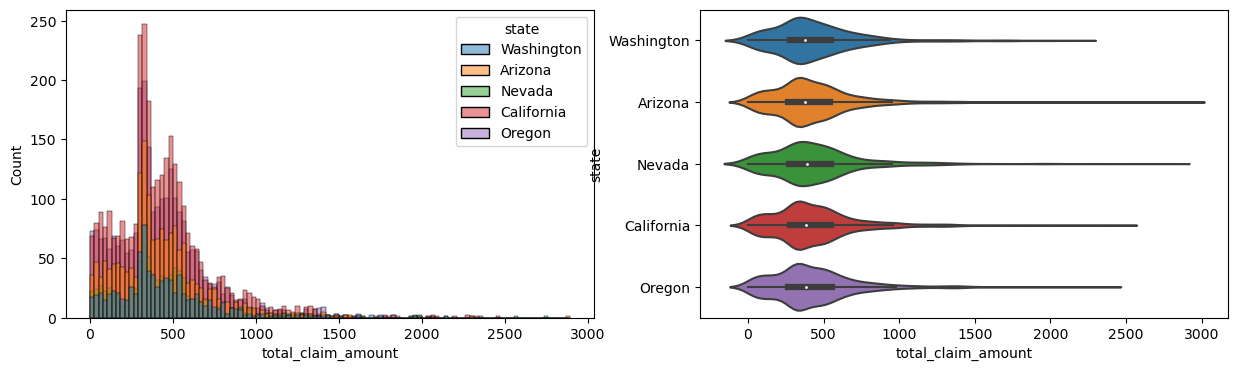

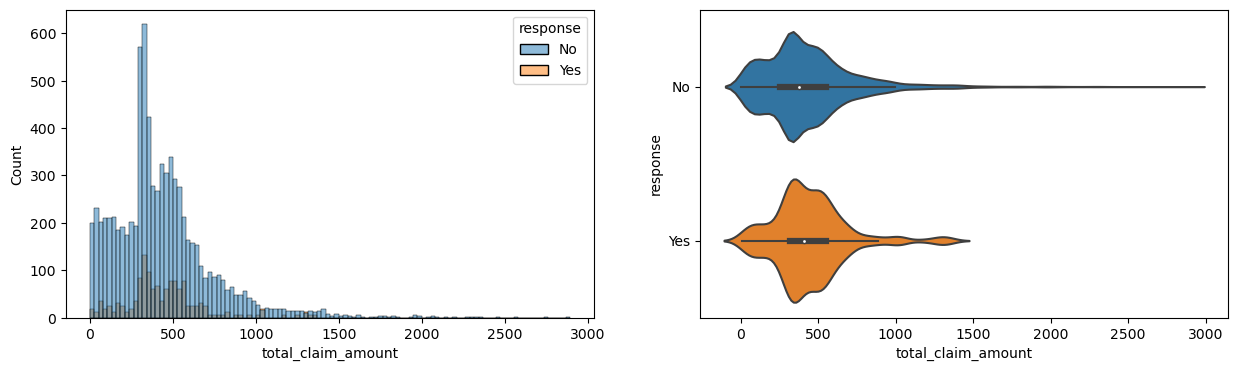

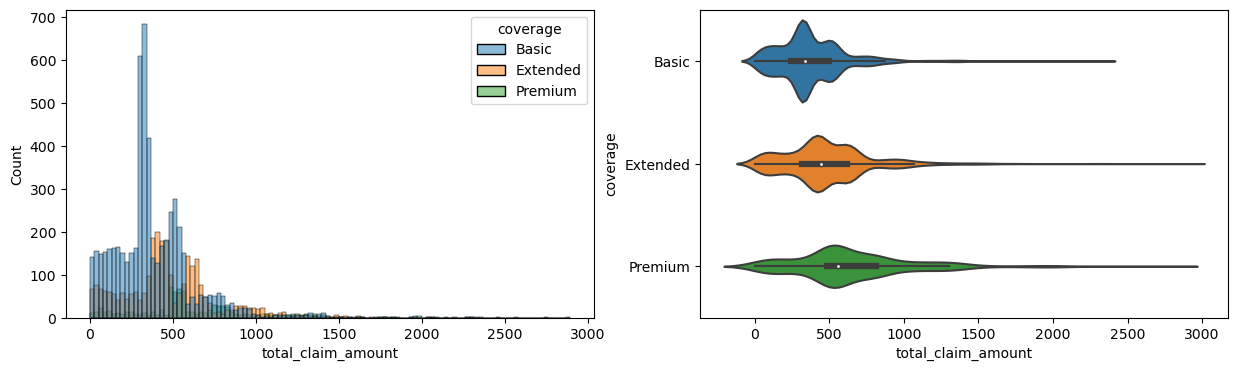

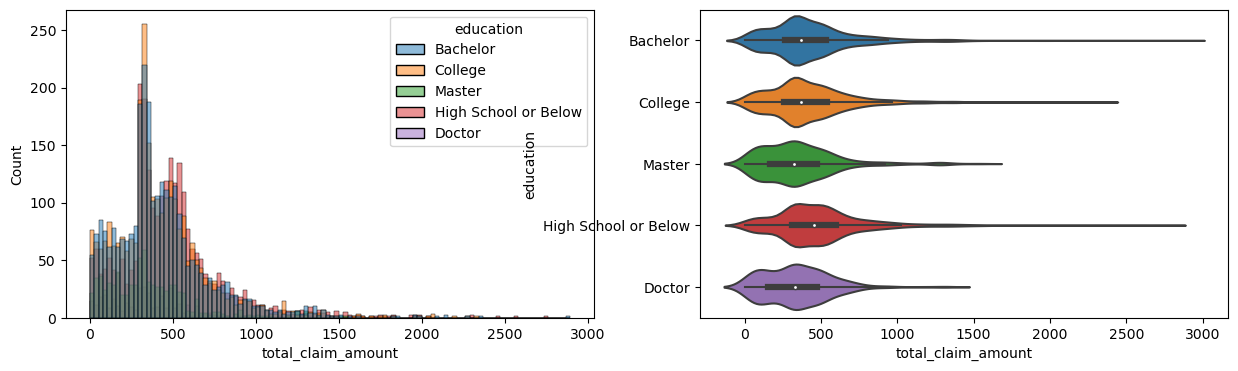

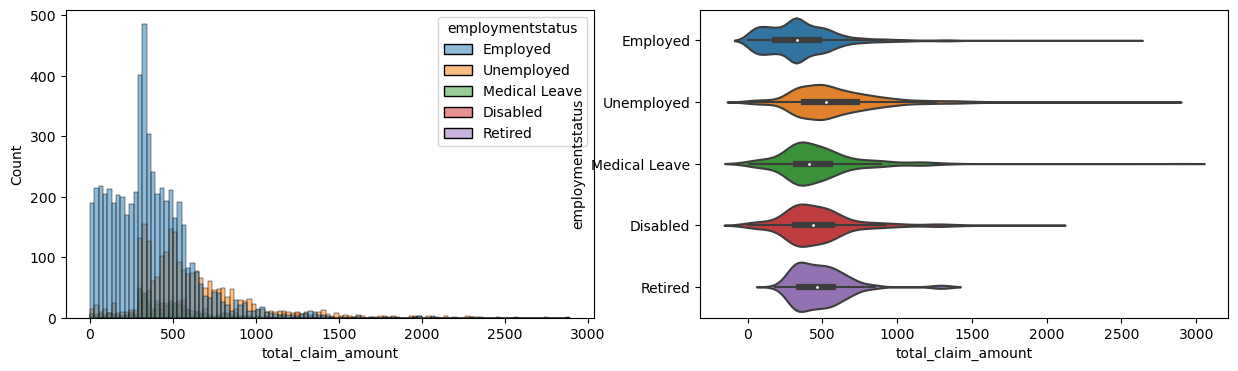

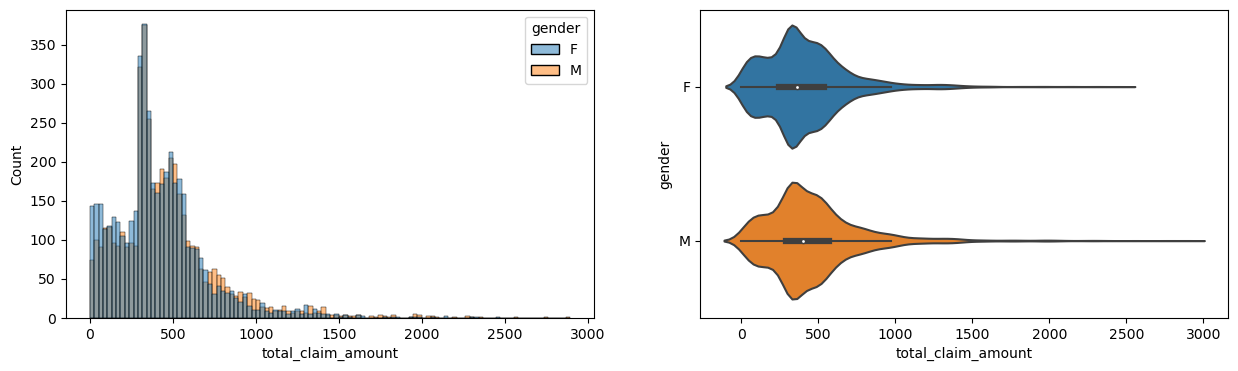

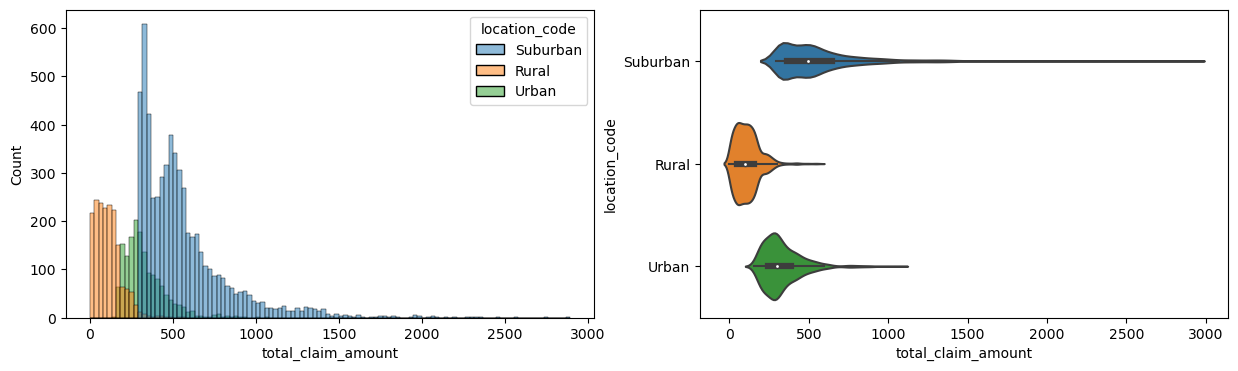

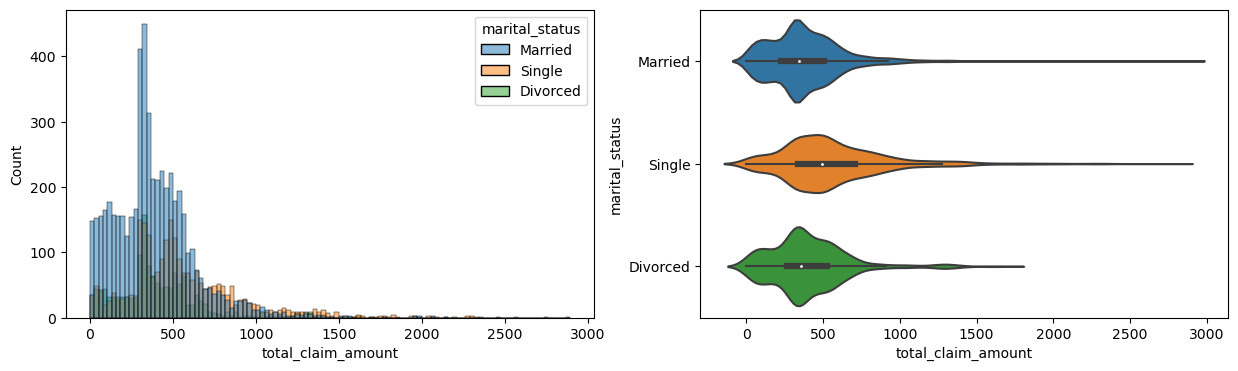

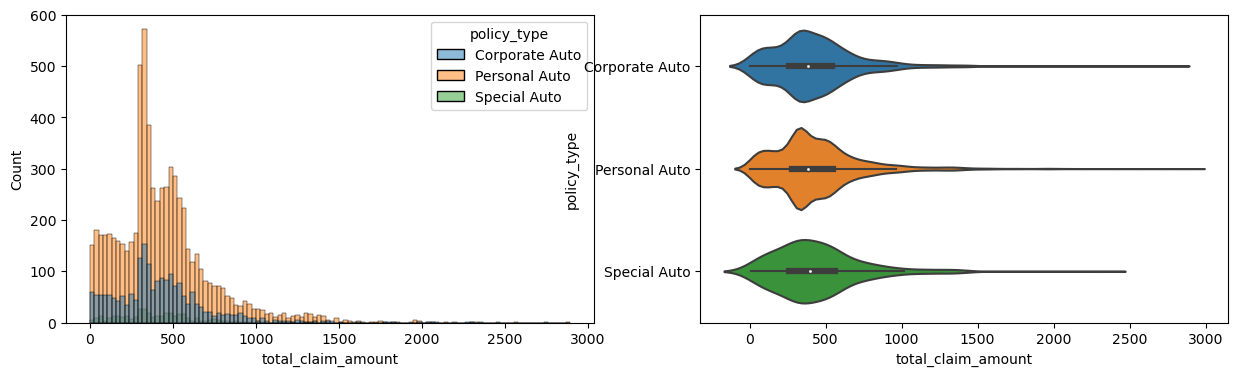

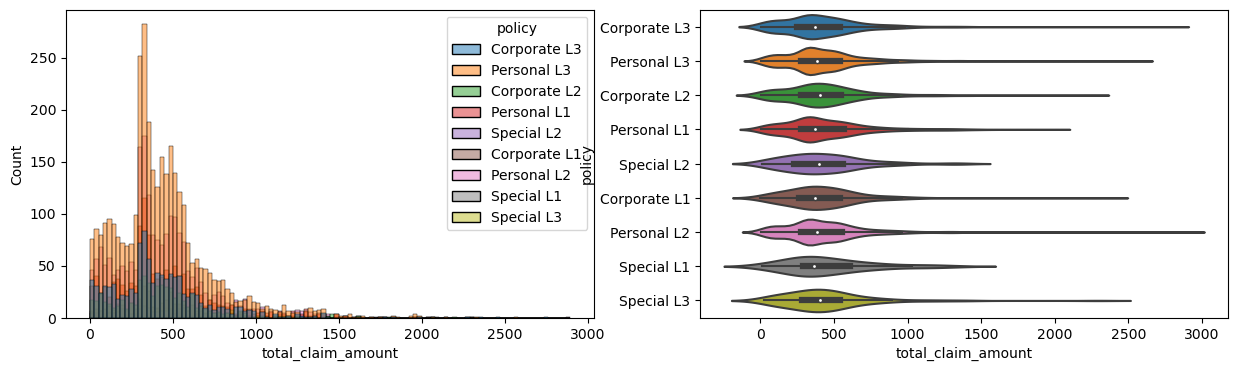

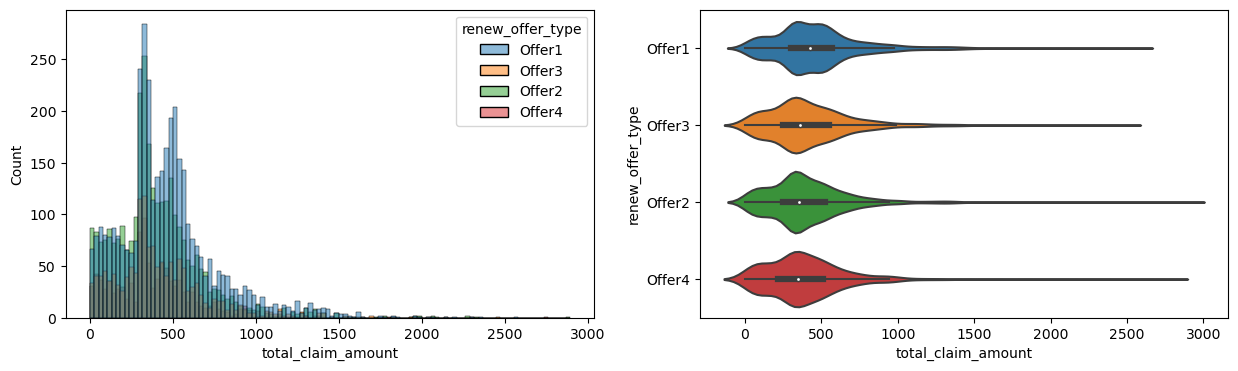

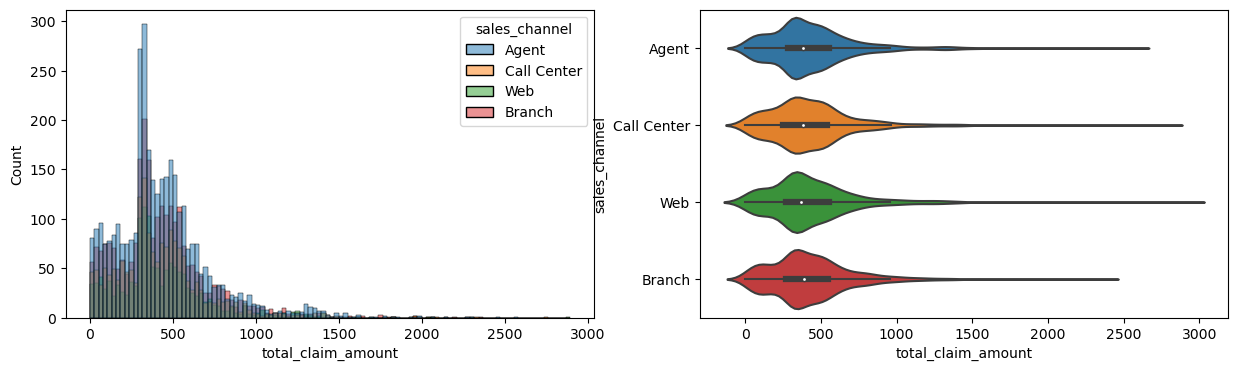

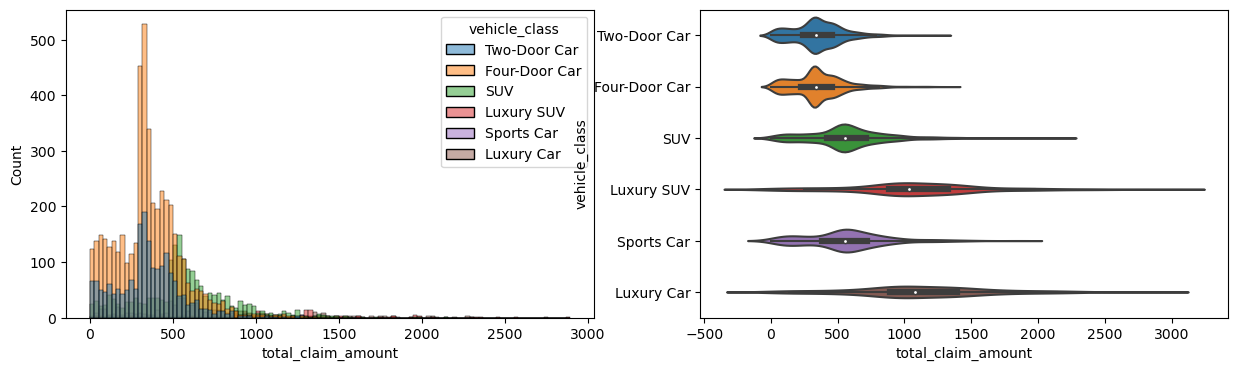

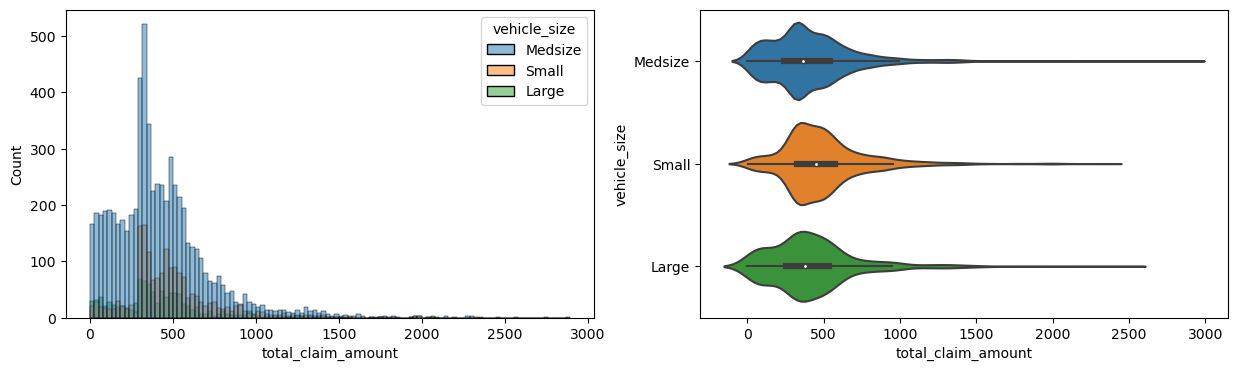

In [31]:
for element in categoricals:
    fig, ax = plt.subplots(1,2, figsize=(15,4))
    sns.histplot(marketing_customer_df, hue=element, x='total_claim_amount', ax=ax[0])
    sns.violinplot(marketing_customer_df, y=element, x='total_claim_amount', ax=ax[1])
    plt.show()

The violin plot is great to compare the distribution of the elements within the columns.
While both gender look similar distributed, you can see differences in education and vehicle class.

As we didn't cover how to select categorical columns I will just leave it as it is and continue with all categoricals in the next steps.